# 데이터 시각화를 통해 인사이트 추출하기
@creator: 김기범

# import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('../dataset/new_train.csv')

train_df.shape

(32470, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 32470 non-null  int64 
 1   sentence           32470 non-null  object
 2   subject_entity     32470 non-null  object
 3   object_entity      32470 non-null  object
 4   label              32470 non-null  object
 5   source             32470 non-null  object
 6   subject_start_idx  32470 non-null  int64 
 7   subject_end_idx    32470 non-null  int64 
 8   subject_type       32470 non-null  object
 9   object_start_idx   32470 non-null  int64 
 10  object_end_idx     32470 non-null  int64 
 11  object_type        32470 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [5]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source,subject_start_idx,subject_end_idx,subject_type,object_start_idx,object_end_idx,object_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation,wikipedia,24,26,ORG,13,18,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation,wikitree,19,23,ORG,14,17,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of,wikitree,21,24,ORG,34,41,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees,wikitree,13,17,ORG,22,24,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation,wikipedia,22,30,ORG,0,3,DAT


# 1. 소스별 데이서 수 보기

In [6]:
train_df['source'].unique()

array(['wikipedia', 'wikitree', 'policy_briefing'], dtype=object)

In [7]:
train_df['source'].value_counts()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64

<Axes: xlabel='source', ylabel='Probability'>

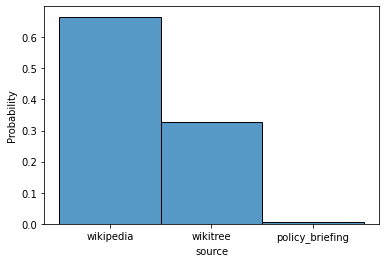

In [8]:
sns.histplot(data=train_df, x='source', stat='probability')

<Axes: xlabel='label', ylabel='count'>

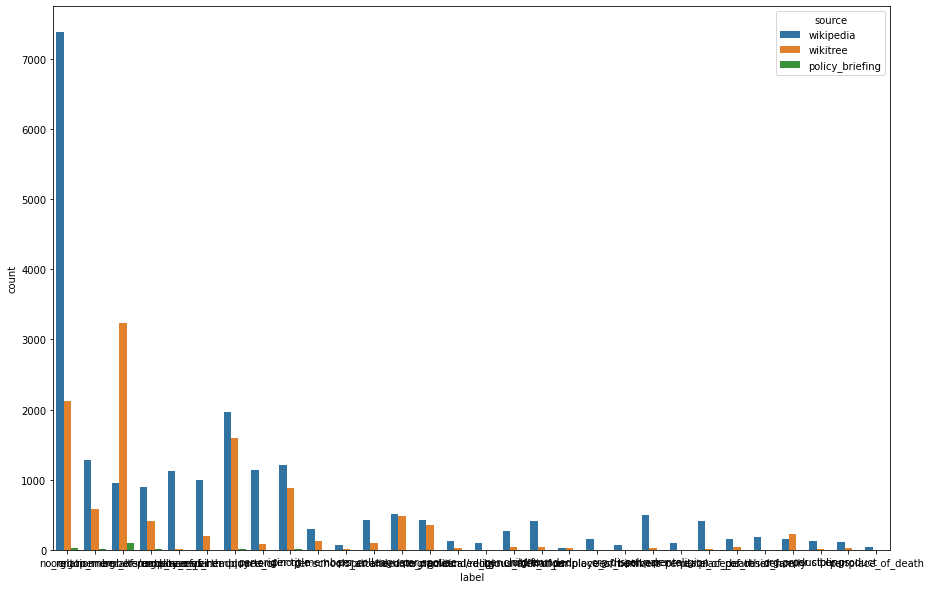

In [9]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train_df, x='label', hue='source', )

# 2. 토크나이징 전 문장 길이 보기

## 2.1 sentence 길이 보기

In [10]:
train_df['sentence'].str.len()

0         59
1         54
2         99
3         78
4         56
        ... 
32465    213
32466     67
32467    115
32468     65
32469    106
Name: sentence, Length: 32470, dtype: int64

(array([6.2240e+03, 1.4638e+04, 7.4180e+03, 2.6710e+03, 9.0700e+02,
        3.8200e+02, 1.2100e+02, 7.0000e+01, 2.9000e+01, 1.0000e+01]),
 array([ 14. ,  58.1, 102.2, 146.3, 190.4, 234.5, 278.6, 322.7, 366.8,
        410.9, 455. ]),
 <BarContainer object of 10 artists>)

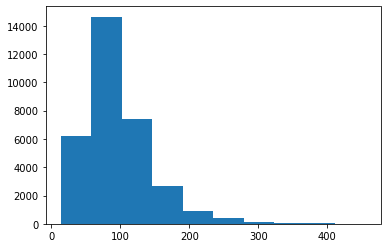

In [11]:
plt.hist(train_df['sentence'].str.len())

## 2.2 entity 길이 보기

(array([2.4235e+04, 7.2230e+03, 8.5900e+02, 1.2200e+02, 2.0000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 2. ,  6.2, 10.4, 14.6, 18.8, 23. , 27.2, 31.4, 35.6, 39.8, 44. ]),
 <BarContainer object of 10 artists>)

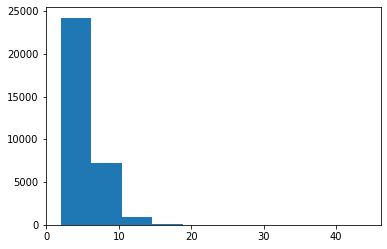

In [12]:
plt.hist(train_df['subject_entity'].str.len())

(array([2.5449e+04, 5.0220e+03, 1.7980e+03, 1.0200e+02, 5.1000e+01,
        2.9000e+01, 9.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 2. ,  6.7, 11.4, 16.1, 20.8, 25.5, 30.2, 34.9, 39.6, 44.3, 49. ]),
 <BarContainer object of 10 artists>)

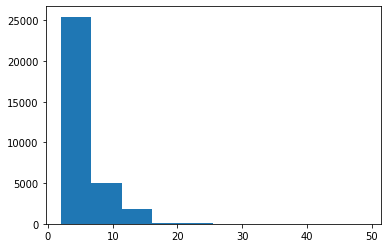

In [13]:
plt.hist(train_df['object_entity'].str.len())

# 3. 토크나이징 후 문장 길이 보기

In [14]:
import transformers

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
tokenizer = transformers.AutoTokenizer.from_pretrained('klue/bert-base')

In [16]:
concat_entity = []
for sub_ent, obj_ent in zip(train_df['subject_entity'], train_df['object_entity']):
    concat_entity.append(obj_ent + " [SEP] " + sub_ent)
    
inputs = tokenizer(
            concat_entity,
            list(train_df['sentence']),
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=400,
            add_special_tokens=True,
)

inputs

{'input_ids': tensor([[    2,  8373, 14113,  ...,     0,     0,     0],
        [    2,  5605,  2250,  ...,     0,     0,     0],
        [    2,  3629, 17287,  ...,     0,     0,     0],
        ...,
        [    2, 31102,  2313,  ...,     0,     0,     0],
        [    2,  4097,  2827,  ...,     0,     0,     0],
        [    2,   615,  2419,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [17]:
len(inputs)

3

In [18]:
inputs['input_ids'].shape

torch.Size([32470, 237])

In [19]:
tokenizer.encode('[PAD]')

[2, 0, 3]

In [20]:
token_count = []

for idx, row in enumerate(inputs['input_ids']):
    try:
        token_count.append(row.tolist().index(0))
    except:
        print(idx)
        

13877


In [21]:
len(tokenizer.encode(train_df['sentence'][13877]))

231

(array([ 3950., 14279.,  8773.,  3388.,  1262.,   497.,   168.,    96.,
           34.,    22.]),
 array([ 14. ,  36.1,  58.2,  80.3, 102.4, 124.5, 146.6, 168.7, 190.8,
        212.9, 235. ]),
 <BarContainer object of 10 artists>)

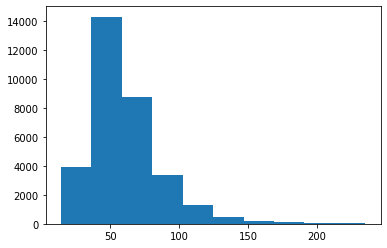

In [22]:
plt.hist(token_count)

## 3.1 max_len을 200으로 해도 [PAD]이 없는 13877 번째 데이터 보기 (예외처리)

In [23]:
train_df.iloc[13877]

id                                                               13877
sentence             1942년 경성치과전문학교 입학을 하였고 1943년 2월에서 1945년 2월까지 2...
subject_entity                                                   서울대학교
object_entity                                                    1946년
label                                                      no_relation
source                                                       wikipedia
subject_start_idx                                                  283
subject_end_idx                                                    287
subject_type                                                       ORG
object_start_idx                                                    89
object_end_idx                                                      93
object_type                                                        DAT
Name: 13877, dtype: object

In [24]:
len(train_df['sentence'][13877])

429

# 4. 레이블 분포 보기

In [25]:
train_df['label'].value_counts(normalize=True) * 100

no_relation                            29.362488
org:top_members/employees              13.193717
per:employee_of                        11.004004
per:title                               6.476748
org:member_of                           5.746843
org:alternate_names                     4.065291
per:origin                              3.800431
org:place_of_headquarters               3.680320
per:date_of_birth                       3.480136
per:alternate_names                     3.082846
per:spouse                              2.448414
per:colleagues                          1.644595
per:parents                             1.601478
org:founded                             1.385895
org:members                             1.293502
per:date_of_death                       1.287342
org:product                             1.170311
per:children                            0.936249
per:place_of_residence                  0.594395
per:other_family                        0.585156
per:place_of_birth  

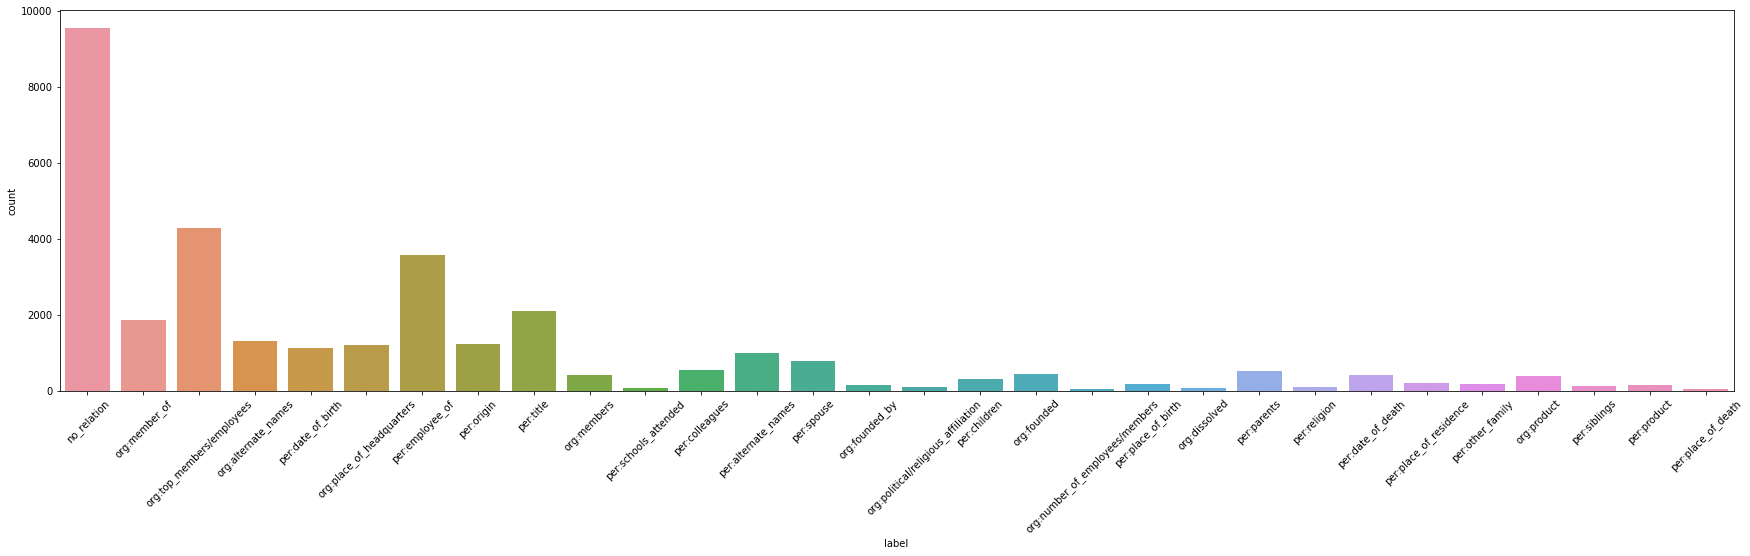

In [26]:
plt.figure(figsize=(30,7))
sns.countplot(x=train_df['label'])
plt.xticks(rotation=45)
plt.show()

# 5. 중복 데이터 확인

In [29]:
column = ['sentence', 'subject_entity', 'object_entity', 'label', 'subject_start_idx', 'object_start_idx', 'subject_end_idx', 'object_end_idx', 'source']
train_df[train_df.duplicated(column, keep=False)].sort_values(by='sentence')

,id,sentence,subject_entity,object_entity,label,source,subject_start_idx,subject_end_idx,subject_type,object_start_idx,object_end_idx,object_type
22090,22090,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...",수페르리가 엘라다,그리스,no_relation,wikipedia,25,33,ORG,36,38,POH
9618,9618,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...",수페르리가 엘라다,그리스,no_relation,wikipedia,25,33,ORG,36,38,POH
25368,25368,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,민주국민당,민주당,no_relation,wikipedia,9,13,ORG,23,25,ORG
2500,2500,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,민주국민당,민주당,no_relation,wikipedia,9,13,ORG,23,25,ORG
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,전라북도청,행정안전부,no_relation,wikipedia,14,18,ORG,29,33,ORG
...,...,...,...,...,...,...,...,...,...,...,...,...
27325,27325,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,권정열,10cm,per:employee_of,wikitree,12,14,PER,6,9,NOH
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,오뚜기,함영준,org:top_members/employees,wikitree,9,11,ORG,5,7,PER
6936,6936,함연지는 함영준 오뚜기 회장의 장녀다.,오뚜기,함영준,org:top_members/employees,wikitree,9,11,ORG,5,7,PER
20898,20898,화려한 재기를 뒤로하고 고(故) 안재환에게 돈을 빌려줬다는 루머로 마음고생을 하던 ...,최진실,2008년 10월 2일,per:date_of_death,wikitree,46,48,PER,51,62,DAT


In [ ]:
train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep=False)].sort_values(by='sentence').head(10)

,id,sentence,subject_entity,object_entity,label,source,subject_start_idx,subject_end_idx,subject_type,object_start_idx,object_end_idx,object_type
22090,22090,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...",수페르리가 엘라다,그리스,no_relation,wikipedia,25,33,ORG,36,38,POH
9618,9618,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...",수페르리가 엘라다,그리스,no_relation,wikipedia,25,33,ORG,36,38,POH
25368,25368,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,민주국민당,민주당,no_relation,wikipedia,9,13,ORG,23,25,ORG
2500,2500,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,민주국민당,민주당,no_relation,wikipedia,9,13,ORG,23,25,ORG
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,전라북도청,행정안전부,no_relation,wikipedia,14,18,ORG,29,33,ORG
255,255,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,전라북도청,행정안전부,no_relation,wikipedia,14,18,ORG,29,33,ORG
31510,31510,4.15 총선 후보로 공천됐다가 최소된 미래통합당 김원성 최고위원이 유서를 남기고 ...,김원성,미래통합당,per:employee_of,wikitree,28,30,PER,22,26,ORG
13993,13993,4.15 총선 후보로 공천됐다가 최소된 미래통합당 김원성 최고위원이 유서를 남기고 ...,김원성,미래통합당,per:employee_of,wikitree,28,30,PER,22,26,ORG
27116,27116,"‘문재인 영입 인사’로 발탁돼 제20대 총선에 광주 서구을에 출마했고, 더불어민주당...",더불어민주당,문재인,no_relation,wikitree,40,45,ORG,1,3,PER
16145,16145,"‘문재인 영입 인사’로 발탁돼 제20대 총선에 광주 서구을에 출마했고, 더불어민주당...",더불어민주당,문재인,no_relation,wikitree,40,45,ORG,1,3,PER


In [ ]:
len(train_df[train_df.duplicated(train_df.columns[1:], keep=False)])

84

## 5.1 sentence, subject_entity, object_entity, label이 모두 똑같은 데이터 수 확인

In [ ]:
len(train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep=False)])

92

In [ ]:
one_idx = train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep=False)].index
two_idx = train_df[train_df.duplicated(train_df.columns[1:], keep=False)].index

idx = set(one_idx).difference(set(two_idx))

idx, len(idx)

({858, 3294, 6352, 6674, 7080, 20838, 25673, 27755}, 8)

In [ ]:
train_df.loc[idx].sort_values(by='sentence')

,id,sentence,subject_entity,object_entity,label,source,subject_start_idx,subject_end_idx,subject_type,object_start_idx,object_end_idx,object_type
27755,27755,"김성수가 경북 경주를 다녀간 지 1년 후 1919년 10월 경성방직이 설립되었고, ...",경성방직,김성수,no_relation,wikipedia,33,36,ORG,0,2,PER
6352,6352,"김성수가 경북 경주를 다녀간 지 1년 후 1919년 10월 경성방직이 설립되었고, ...",경성방직,김성수,no_relation,wikipedia,50,53,ORG,0,2,PER
20838,20838,박시종 예비후보는 전남 화순 출신으로 ▲서울대학교 삼민투위원장 ▲김대중 대통령 후보...,더불어민주당,문재인,org:top_members/employees,wikitree,67,72,ORG,58,60,PER
3294,3294,박시종 예비후보는 전남 화순 출신으로 ▲서울대학교 삼민투위원장 ▲김대중 대통령 후보...,더불어민주당,문재인,org:top_members/employees,wikitree,67,72,ORG,95,97,PER
7080,7080,박춘석 등 5인은 조선민주주의인민공화국을 수립한다는 미명하에 이영으로부터 좌익정당 ...,장택상,이승만,no_relation,wikipedia,140,142,PER,174,176,PER
6674,6674,박춘석 등 5인은 조선민주주의인민공화국을 수립한다는 미명하에 이영으로부터 좌익정당 ...,장택상,이승만,no_relation,wikipedia,140,142,PER,50,52,PER
25673,25673,"한편 조오섭 예비후보는 담양 출생으로 동신고, 전남대 신방과 졸업하고 △6·7대 광...",문재인,더불어민주당,per:employee_of,wikitree,122,124,PER,102,107,ORG
858,858,"한편 조오섭 예비후보는 담양 출생으로 동신고, 전남대 신방과 졸업하고 △6·7대 광...",문재인,더불어민주당,per:employee_of,wikitree,80,82,PER,174,179,ORG


In [ ]:
len(train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep='first')])

46

## 5.2 sentence, subject_entity, object_entity만 똑같은 데이터 수 확인

In [ ]:
len(train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity'], keep='first')]) - 46

7

In [ ]:
case_2_df = train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity'], keep=False)].drop(train_df[train_df.duplicated(['sentence', 'subject_entity', 'object_entity', 'label'], keep=False)].index, axis=0).sort_values(by='sentence')

for idx, row in case_2_df.iterrows():
    print('='*10, idx, '='*10)
    print(row['sentence'])
    print(row['subject_entity'], row['object_entity'], row['label'])

========== 13496 ==========
2015년 11월 조현아 전 대한항공 부사장, 조원태 대한항공 부사장, 조현민 대한항공 전무 등 조양호 회장의 세 자녀가 보유하던 싸이버스카이 지분을 대한항공에 모두 팔았다.
대한항공 조양호 org:top_members/employees
========== 18458 ==========
2015년 11월 조현아 전 대한항공 부사장, 조원태 대한항공 부사장, 조현민 대한항공 전무 등 조양호 회장의 세 자녀가 보유하던 싸이버스카이 지분을 대한항공에 모두 팔았다.
대한항공 조양호 no_relation
========== 6749 ==========
대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
대한항공 조양호 no_relation
========== 12829 ==========
대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
대한항공 조양호 org:top_members/employees
========== 8364 ==========
배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우지만 반대로 하는 일마다 대박을 치는 캐릭터이다.
정복동 김병철 no_relation
========== 32299 ==========
배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우지만 반대로 하는 일마다 대박을 치는 캐릭터이다.
정복동 김병철 per:alternate_names
========== 11511 ==========
영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나리가 힘을 합쳐 한 소녀를 구한다는 이야기다.
배트맨 고담시 per:place_of_residence
========== 22258 ==========
영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스

# 6. sentence 특징 파악하기

## 6.1 자음 있는지 확인

In [ ]:
train_df['sentence'].str.extract('([ㄱ-ㅎㅏ-ㅣ]+)').value_counts().sum()

7

In [ ]:
train_df['sentence'].str.extract('([ㄱ-ㅎㅏ-ㅣ]+)').value_counts()

ㅠㅠ     2
ㅅㅅㅅ    2
ㄱ      2
ㅁㅎㅇ    1
dtype: int64

In [ ]:
train_df.loc[train_df['sentence'].str.extract('([ㄱ-ㅎㅏ-ㅣ]+)').dropna().index]['sentence'].values

array(['일각에서는 "유느 또 멀어지네ㅠㅠ", "와 진짜 바쁘겠다", "영어 하면 진짜 늘긴 해 영포자 궁금하긴 하다", "유느님은 못하는 게 뭔데...", "재밌긴 하겠네", "유재석은 시간이 48시간이야 힘들겠다. 대단해", "헐 방송보면서 같이 도전해봐도 되겠다", "유느님 점점 전설의 동물처럼 되어가...", "안 그래도 연말에 힘들어 보인다는 말 많았는데 유느 다크 더 내려오는 거 아니니" 등의 말로 유재석 씨를 걱정하면서도 기대된다는 반응을 보이기도 했다.',
       '1506년(연산군 15년) 9월 종종반정 직후 멀리 있어 반정에는 불참하였으나 다시 형조참판에 특별 제수되고, 중종의 외삼촌으로서 자신이 진성대군 시절 잠저(潛邸) 때에 보필한 ㄱ공이 있다는 중종의 지시로, 박원종, 유자광, 신준, 구수영, 김감, 정미수, 유순정, 성희안 등이 찬성하면서 공신으로 선정된다.',
       '인천광역시교육청(교육감 도성훈)은 검정고무신 이우영 작가와 함께하는 「교가‘ㄱ’나니 」 카드 뉴스를 배포하여 눈길을 끌고 있다.',
       "대부분 커뮤니티 이용자들은 댓글을 통해 'ㅁㅎㅇ'이 유튜버 '뭐혜연'(정혜연·16)이라는 의견을 내놓았다.",
       '그는 지난해 자신의 인스타그램에 아이유의 콘서트장에서 함께한 사진을 올린 뒤 “앵콜 포함해 네 시간을 지루할 틈 없이 채우는 너란 가수 대체. ㅠㅠ 왜 이렇게 울컥하든지 흑흑 자랑스러운 이지은. 네가 오래오래 노래하면 참 좋겠다. 이젠 정말 공연이 기다려지는 가수다”란 글을 올리기도 했다.',
       "한편 지난 4월 시작한 '배거슨 라이브 ㅅㅅㅅ'는 배성재 캐스터가 매주 화제의 스포츠인들과 펼치는 라이브 토크쇼다.",
       "SBS모바일24는 배성재가 진행하는 스포츠 토크쇼 '배거슨라이브 ㅅㅅㅅ'에 오는 27일 오후 6시 박지성 JS 재단 이사장이 출연한다고 25일 예고했다."],
      dtype=object)

## 6.2 숫자 있는지 확인

In [ ]:
train_df['sentence'].str.extract('([0-9]+)').value_counts().sum()

23952

In [ ]:
train_df.loc[train_df['sentence'].str.extract('([0-9]+)').dropna().index]['sentence'].values

array(['〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.',
       'K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.',
       '균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.',
       ...,
       '한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등록 마감 결과, 강석호(3선·경북 영양·영덕·봉화·울진)-이장우(재선·대전 동구), 유기준(4선·부산 서구·동구)-박성중(초선·서울 서초을), 김선동(재선·서울 도봉을)-김종석(초선·비례), 심재철(5선·경기 안양시동안구을)-김재원(3선·경북 상주·군위·의성·청송) 등 4개 조가 등록했다고 밝혔다.',
       "완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 229개 기초지자체 중 최상위 등급인 A등급을 받으면서 전국에서 가장 높은 교통안전 인식 수준을 갖고 있는 것으로 나타났다.",
       '화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버스 승강장, 공중화장실 등 다중이용시설과 오동리 천운아파트 주변을 소독하는 방역 봉사활동을 펼쳤다고 밝혔다.'],
      dtype=object)

## 6.3 한자 있는지 확인

In [ ]:
train_df['sentence'].str.extract('([一-龥]+)').value_counts().sum()

2313

In [ ]:
train_df.loc[train_df['sentence'].str.extract('([一-龥]+)').dropna().index]['sentence'].values

array(['박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ 2009년 11월 4일)는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.',
       '김동성(金東聖, 1980년 2월 9일 ~)은 대한민국의 쇼트트랙 선수이다.',
       '칸트는 미(美)란 숭고함이다라고 주장하였는데 그의 이러한 주장은 윌리엄 터너(Joseph Mallord William Turner)와 같은 낭만주의 화가들에게 받아들여졌다.',
       ...,
       '간 나오토는 총리 취임에 즈음해 당 간사장에 에다노 유키오, 내각관방장관에 센고쿠 요시토를 임명하는 등 모든 주요 직책에 비(非)오자와계 의원을 포진시켰다.',
       '이때 만주 지역에는 크고작은 독립군이 조직되었고, 동만주지방의 홍범도가 이끄는 대한독립군, 안무(安武)가 이끄는 국민회군, 최진동(崔振東)이 지휘하는 군무도독부군은 1920년 초부터 서로 연결, 연합하여 활동하였다.',
       '신대철(申大澈, 1967년 2월 16일 ~)은 대한민국의 음악가이다.'], dtype=object)

## 6.4 일본어 있는지 확인

In [ ]:
train_df['sentence'].str.extract('([ぁ-ゔァ-ヴー々〆〤]+)').value_counts().sum()

54

In [ ]:
train_df.loc[train_df['sentence'].str.extract('([ぁ-ゔァ-ヴー々〆〤]+)').dropna().index]['sentence'].values

array(['일본의 진언종은 구카이(空海くうかい홍법 대사: 774-835)가 중국 당나라의 장안으로 건너가 청룡사에서 혜과로부터 배운 밀교를 기반으로 하고 있다.',
       '미즈하라 코요미(보통 요미(よみ)(よみ)로 불린다, 한국어 더빙판은 박재경)는 일본의 애니메이션과 만화 시리즈 《아즈망가 대왕》에 등장하는 인물이다.',
       '《베요네타》(ベヨネッタ)는 일본의 Platinum Games와 세가가 개발한 액션 비디오 게임이다.',
       '시라토리 닌자부로(しらとり にんざぶろう)는 아오야마 고쇼의 만화 《명탐정 코난》에 등장하는 인물이다.',
       '그렇게 에렌과 그를 열렬히 신봉하고 추종하는 예거파 병사들, 신병들의 병단의 손아귀에서 완벽히 탈주한 직후의 난황을 그리는 《111화: 숲 속의 아이들(森の子ら)》에서는 휘하의 고참 부하들이자 현직 간부들인 미카사 아커만, 아르민 아를레르트, 장 키르슈타인, 코니 스프링거, 그리고 조사병단에 탈주하지 않고, 남아 있는 잔여 병력들을 데리고 다리우스 작클리가 사망한 병영의 한 방에서 헌병단의 단장 나일 도크와 나일 휘하의 동료들인 로그와 그 외의 헌병단원들과 일대일 구도로 대치한다.',
       '"호시조라 미유키"(みゆき 한국명:김다솜)는 토에이 애니메이션 제작의 애니메이션《스마일 프리큐어!》에 등장하는 가공의 인물이다.',
       '자회사인 주식회사 애니메이션 두(株式会社アニメーションドゥウ)는 교토 애니메이션의 제작 부서로서 설립되었다.',
       '배우 카라타 에리카(唐田 えりか·22)와의 불륜으로 모두를 충격에 빠트린 히가시데 마사히로(東出昌大·32)가 불륜에 관한 질문에 한 답변이 화제다다.',
       '이 조직은 일본사회당 및 그 후신인 사회민주당을 지지했지만, 민주당 결성 이후 지지축을 민주당으로 옮기는 움직임이 강해지면서 1997년 민주리버럴노조회의(民主・リベラル労組会議)로 전환되었다.',
       '소설가 아쿠타가와 류노스케가 쓴 두 편의 단편 

## 6.5 연속된 특수 문자 찾아내기

In [ ]:
train_df['sentence'].str.extract('([^A-Za-z0-9가-힣\sぁ-ゔァ-ヴー々〆〤一-龥]{2,9999})').value_counts().sum()

4326

In [ ]:
train_df['sentence'].str.extract('([^A-Za-z0-9가-힣\sぁ-ゔァ-ヴー々〆〤一-龥]{2,9999})').value_counts()

~)     1397
),      776
)(      245
)'      124
."      105
       ... 
.》        1
.〉,       1
.∼        1
.”.       1
-)(       1
Length: 282, dtype: int64

In [ ]:
train_df.loc[train_df['sentence'].str.extract('([^A-Za-z0-9가-힣\sぁ-ゔァ-ヴー々〆〤一-龥]{2,9999})').dropna().index]['sentence'].values

array([': 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 기구 (WHO), 지중해 연합, 이슬람 협력 기구, 유럽 안보 협력 기구, 국제 통화 기금, 세계무역기구 그리고 프랑코포니.',
       '박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ 2009년 11월 4일)는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.',
       '로버트 조지 (바비) 실(Robert George (Bobby)(Bobby) Seale, 1936년 10월 22일 ~ )은 아프리카계 미국인 인권 운동가이자, 휴이 뉴튼과 함께 흑표당의 창립자이다.',
       ..., '신대철(申大澈, 1967년 2월 16일 ~)은 대한민국의 음악가이다.',
       "대학 졸업 직후, 그는 '스티어 프라이데이 나이트(Stir Friday Night)'란 아시아계 미국인들로 구성된 스케치 코미디 그룹에 들어갔다.",
       '한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등록 마감 결과, 강석호(3선·경북 영양·영덕·봉화·울진)-이장우(재선·대전 동구), 유기준(4선·부산 서구·동구)-박성중(초선·서울 서초을), 김선동(재선·서울 도봉을)-김종석(초선·비례), 심재철(5선·경기 안양시동안구을)-김재원(3선·경북 상주·군위·의성·청송) 등 4개 조가 등록했다고 밝혔다.'],
      dtype=object)

# 7. 상위 & 하위 토큰 보기

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(token_count)

len(counter)

201

## 7.1 상위 10개

In [ ]:
most_10 = counter.most_common(30)

most_10

[(48, 733),
 (50, 701),
 (47, 695),
 (46, 690),
 (49, 690),
 (45, 689),
 (44, 682),
 (51, 678),
 (42, 664),
 (43, 664),
 (54, 658),
 (55, 658),
 (52, 656),
 (53, 647),
 (40, 631),
 (41, 627),
 (58, 612),
 (56, 609),
 (57, 608),
 (39, 594),
 (60, 565),
 (37, 550),
 (38, 543),
 (59, 538),
 (63, 519),
 (61, 517),
 (35, 502),
 (62, 485),
 (36, 483),
 (64, 480)]

In [ ]:
for k, v in most_10:
    print(tokenizer.decode(k), end=" ")

L N K J M I H O F G R S P Q D E V T U C X A B W [ Y ? Z @ ] 

## 7.2 하위 10개

In [ ]:
least_10 = sorted(counter.items(), key=lambda x: x[1])[:30]

least_10

[(223, 1),
 (190, 1),
 (204, 1),
 (216, 1),
 (206, 1),
 (16, 1),
 (235, 1),
 (209, 1),
 (181, 1),
 (14, 1),
 (234, 1),
 (163, 1),
 (202, 1),
 (203, 1),
 (224, 2),
 (227, 2),
 (213, 2),
 (191, 2),
 (186, 2),
 (177, 2),
 (219, 2),
 (178, 2),
 (195, 2),
 (194, 2),
 (215, 2),
 (222, 3),
 (205, 3),
 (156, 3),
 (208, 3),
 (171, 3)]

In [ ]:
for k, v in least_10:
    print(tokenizer.decode(k), end=" ")

九 ㅈ ㎖ 上 ㎝ , 作 ㎢ ・ * 佛 ♥ ㎎ ㎏ 也 五 一 ㅋ ㅁ 】 世 〔 ㅜ ㅏ 三 之 ㎜ ○ ㎡ 》 

# 8. type별 시각화

## 8.1 subject

In [ ]:
train_df['subject_type'].value_counts()

PER    16786
ORG    15684
Name: subject_type, dtype: int64

<Axes: xlabel='subject_type', ylabel='count'>

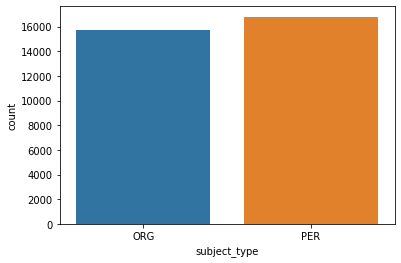

In [ ]:
sns.countplot(data=train_df, x='subject_type')

<Axes: xlabel='label', ylabel='count'>

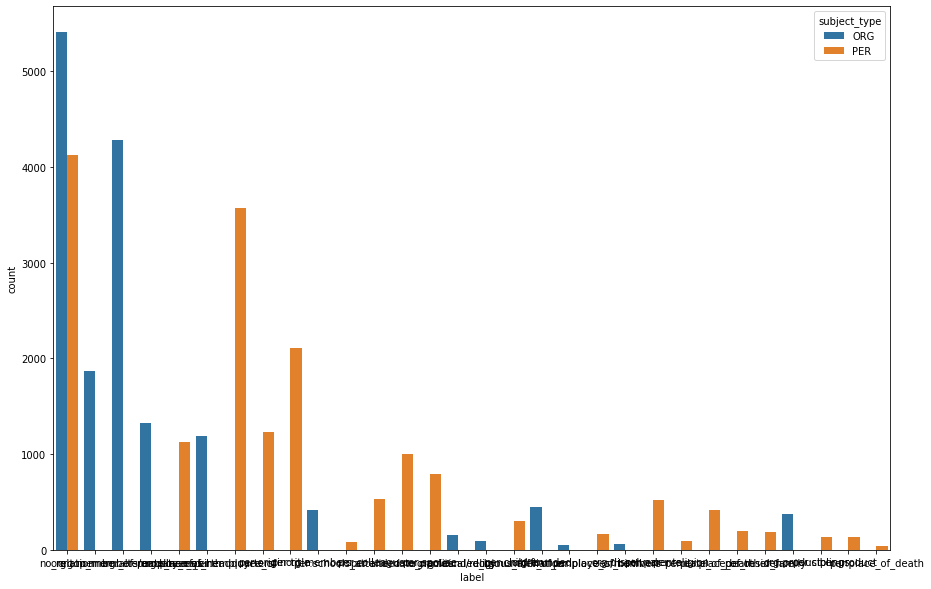

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train_df, x='label', hue='subject_type')

## 8.2 object

<Axes: xlabel='object_type', ylabel='count'>

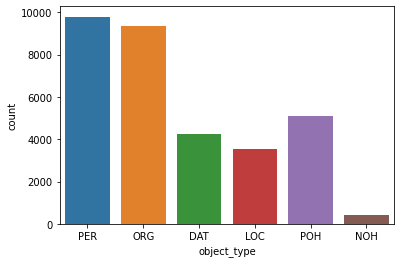

In [ ]:
sns.countplot(data=train_df, x='object_type')

<Axes: xlabel='label', ylabel='count'>

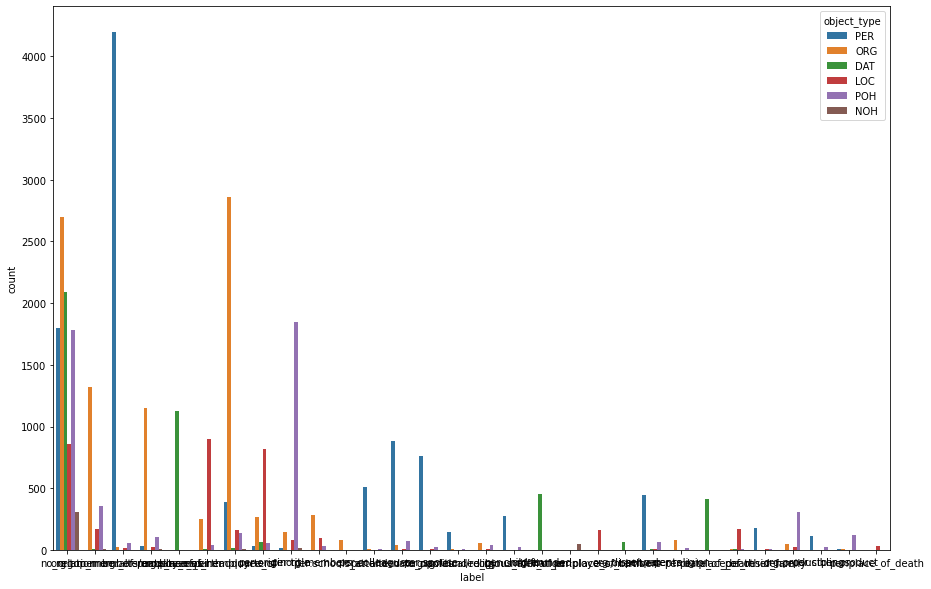

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train_df, x='label', hue='object_type')